In [132]:
# Zu verwendende Bibliotheken importieren
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import shapely.geometry

In [133]:
# STATPOP einlesen und erste Zeilen anschauen

statpop = pd.read_csv(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\Statpop/Statpop_Glarus2.csv',
                sep=';',
                usecols = ['RELI', 'E_KOORD','N_KOORD','B21BTOT'])
statpop.head()

,RELI,E_KOORD,N_KOORD,B21BTOT
0,71192090,2711900,1209000,3
1,71292091,2712900,1209100,3
2,71312093,2713100,1209300,3
3,71322088,2713200,1208800,3
4,71332089,2713300,1208900,3


In [134]:
statpop

,RELI,E_KOORD,N_KOORD,B21BTOT
0,71192090,2711900,1209000,3
1,71292091,2712900,1209100,3
2,71312093,2713100,1209300,3
3,71322088,2713200,1208800,3
4,71332089,2713300,1208900,3
...,...,...,...,...
2225,73292029,2732900,1202900,8
2226,73301978,2733000,1197800,6
2227,73302030,2733000,1203000,3
2228,73311977,2733100,1197700,3


In [135]:
#Kopien der Dataframes erstellen und die Koordinaten der vier Ecken definieren.
statpop2 = statpop.copy()
statpop2['E_KOORD'] = statpop2['E_KOORD']+100

statpop3 = statpop.copy()
statpop3['E_KOORD'] = statpop3['E_KOORD']+100
statpop3['N_KOORD'] = statpop3['N_KOORD']+100

statpop4 = statpop.copy()
statpop4['N_KOORD'] = statpop4['N_KOORD']+100

statpop5 = statpop.copy()

In [136]:
#Die vier Dataframes zusammenführen.
statpoptot = pd.concat([statpop, statpop2, statpop3, statpop4, statpop5])
statpoptot

,RELI,E_KOORD,N_KOORD,B21BTOT
0,71192090,2711900,1209000,3
1,71292091,2712900,1209100,3
2,71312093,2713100,1209300,3
3,71322088,2713200,1208800,3
4,71332089,2713300,1208900,3
...,...,...,...,...
2225,73292029,2732900,1202900,8
2226,73301978,2733000,1197800,6
2227,73302030,2733000,1203000,3
2228,73311977,2733100,1197700,3


In [137]:
#Ein Geodataframe erstellen mit Polygonen welches aus den vier Punkten einer Rasterzelle bestehen.
gdf= gpd.GeoDataFrame(
    statpoptot.groupby("RELI").apply(
        lambda d: pd.Series(
            {
                "geometry": shapely.geometry.Polygon(
                    d.loc[:, ["E_KOORD", "N_KOORD"]].values
                ),
            }
        )
    )
,crs="EPSG:2056")

In [140]:
#Mit initialem Dataframe zusammenführen um die Anzahl Einwohner zu erhalten.
StatpopRaster = pd.merge(gdf, statpop, on='RELI')
StatpopRaster

,RELI,geometry,E_KOORD,N_KOORD,B21BTOT
0,71192090,"POLYGON ((2711900.000 1209000.000, 2712000.000...",2711900,1209000,3
1,71292091,"POLYGON ((2712900.000 1209100.000, 2713000.000...",2712900,1209100,3
2,71312093,"POLYGON ((2713100.000 1209300.000, 2713200.000...",2713100,1209300,3
3,71322088,"POLYGON ((2713200.000 1208800.000, 2713300.000...",2713200,1208800,3
4,71332089,"POLYGON ((2713300.000 1208900.000, 2713400.000...",2713300,1208900,3
...,...,...,...,...,...
2225,73292029,"POLYGON ((2732900.000 1202900.000, 2733000.000...",2732900,1202900,8
2226,73301978,"POLYGON ((2733000.000 1197800.000, 2733100.000...",2733000,1197800,6
2227,73302030,"POLYGON ((2733000.000 1203000.000, 2733100.000...",2733000,1203000,3
2228,73311977,"POLYGON ((2733100.000 1197700.000, 2733200.000...",2733100,1197700,3


In [141]:
#in WGS84 transformieren
StatpopRaster = StatpopRaster.to_crs(epsg='4326')
StatpopRaster

,RELI,geometry,E_KOORD,N_KOORD,B21BTOT
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3
1,71292091,"POLYGON ((8.92379 47.02333, 8.92510 47.02331, ...",2712900,1209100,3
2,71312093,"POLYGON ((8.92647 47.02510, 8.92778 47.02508, ...",2713100,1209300,3
3,71322088,"POLYGON ((8.92766 47.02058, 8.92897 47.02057, ...",2713200,1208800,3
4,71332089,"POLYGON ((8.92900 47.02147, 8.93031 47.02145, ...",2713300,1208900,3
...,...,...,...,...,...
2225,73292029,"POLYGON ((9.18498 46.96387, 9.18630 46.96385, ...",2732900,1202900,8
2226,73301978,"POLYGON ((9.18481 46.91799, 9.18612 46.91797, ...",2733000,1197800,6
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3
2228,73311977,"POLYGON ((9.18609 46.91707, 9.18740 46.91705, ...",2733100,1197700,3


In [142]:
# Als interaktive Karte plotten
import folium
m = folium.Map([47.07507, 9.06587], zoom_start=10, tiles='cartodbpositron')
folium.GeoJson(StatpopRaster).add_to(m)
folium.LatLngPopup().add_to(m)
m

# 2. GWR Gebäudedaten aufbereiten

In [235]:
# GWR-Daten Gebäude einlesen und erste Zeilen anschauen

Gebaeude = pd.read_csv(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\GWR/gebaeude_batiment_edificio.csv',
                sep='\t',
                usecols = ['GGDENR','GGDENAME','GKODE','GKODN','GKAT','GENH1','GEBF','GAREA','GBAUJ'])
Gebaeude.head()

,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GBAUJ,GAREA,GEBF,GENH1
0,1630,Glarus Nord,2728994.079,1220577.999,1020.0,2001.0,130.0,NaN,7598.0
1,1630,Glarus Nord,2729002.560,1220562.723,1020.0,2001.0,152.0,NaN,7598.0
2,1630,Glarus Nord,2728624.604,1220458.168,1020.0,2002.0,173.0,NaN,7530.0
3,1630,Glarus Nord,2728375.697,1220483.098,1020.0,2007.0,102.0,NaN,7598.0
4,1630,Glarus Nord,2724463.782,1216958.423,1020.0,2001.0,157.0,NaN,7598.0


# Energiequellen mit NaN als "Unbestimmt" weiter verwenden.

In [236]:
# Die korrekten Bezeichnungen den Heizcodes zuweisen und als Liste speichern.
Gebaeude['Energiequelle'] = Gebaeude.GENH1.replace({
                                            7500: 'Keine',
                                            7501: 'Weitere',
                                            7510: 'Weitere',
                                            7511: 'Weitere',
                                            7512: 'Weitere',
                                            7513: 'Weitere',
                                            7520: 'Gas',
                                            7530: 'Heizöl',
                                            7540: 'Weitere',
                                            7541: 'Weitere',
                                            7542: 'Weitere',
                                            7543: 'Weitere',
                                            7550: 'Weitere',
                                            7560: 'Weitere',
                                            7570: 'Weitere',
                                            7580: 'Weitere',
                                            7581: 'Weitere',
                                            7582: 'Weitere',
                                            7598: 'Unbestimmt',
                                            7599: 'Keine'
                                            })

In [238]:
# NULL Werte bei der Energiequelle werden zu "Unbestimmt" gemappt
Gebaeude['Energiequelle'] = Gebaeude['Energiequelle'].fillna('Unbestimmt')
Gebaeude

,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GBAUJ,GAREA,GEBF,GENH1,Energiequelle
0,1630,Glarus Nord,2728994.079,1220577.999,1020.0,2001.0,130.0,NaN,7598.0,Unbestimmt
1,1630,Glarus Nord,2729002.560,1220562.723,1020.0,2001.0,152.0,NaN,7598.0,Unbestimmt
2,1630,Glarus Nord,2728624.604,1220458.168,1020.0,2002.0,173.0,NaN,7530.0,Heizöl
3,1630,Glarus Nord,2728375.697,1220483.098,1020.0,2007.0,102.0,NaN,7598.0,Unbestimmt
4,1630,Glarus Nord,2724463.782,1216958.423,1020.0,2001.0,157.0,NaN,7598.0,Unbestimmt
...,...,...,...,...,...,...,...,...,...,...
28081,1632,Glarus,2723090.045,1212358.237,1060.0,NaN,340.0,NaN,7598.0,Unbestimmt
28082,1632,Glarus,2723126.304,1214790.395,1060.0,1995.0,4730.0,NaN,7530.0,Heizöl
28083,1632,Glarus,2722501.227,1212632.517,1060.0,1975.0,1918.0,NaN,7530.0,Heizöl
28084,1632,Glarus,2723518.619,1212050.656,1060.0,1969.0,323.0,NaN,NaN,Unbestimmt


In [241]:
#Gebäude ohne Wohnnutzung (GKAT=1060) werden rausgefiltert
Wohngebaeude = Gebaeude.query('GKAT in[1010, 1020, 1030, 1040, 1080]')
Wohngebaeude

,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GBAUJ,GAREA,GEBF,GENH1,Energiequelle
0,1630,Glarus Nord,2728994.079,1220577.999,1020.0,2001.0,130.0,NaN,7598.0,Unbestimmt
1,1630,Glarus Nord,2729002.560,1220562.723,1020.0,2001.0,152.0,NaN,7598.0,Unbestimmt
2,1630,Glarus Nord,2728624.604,1220458.168,1020.0,2002.0,173.0,NaN,7530.0,Heizöl
3,1630,Glarus Nord,2728375.697,1220483.098,1020.0,2007.0,102.0,NaN,7598.0,Unbestimmt
4,1630,Glarus Nord,2724463.782,1216958.423,1020.0,2001.0,157.0,NaN,7598.0,Unbestimmt
...,...,...,...,...,...,...,...,...,...,...
27357,1632,Glarus,2722445.175,1211870.242,1030.0,NaN,80.0,NaN,7520.0,Gas
27358,1632,Glarus,2722416.785,1211868.463,1020.0,NaN,175.0,NaN,7520.0,Gas
28067,1632,Glarus,2723948.948,1210796.732,1020.0,1993.0,166.0,NaN,7520.0,Gas
28069,1632,Glarus,2724022.210,1211144.756,1040.0,NaN,753.0,NaN,7530.0,Heizöl


In [242]:
Wohngebaeude.isnull().sum()

GGDENR               0
GGDENAME             0
GKODE                3
GKODN                3
GKAT                 0
GBAUJ            12662
GAREA              682
GEBF             14830
GENH1              567
Energiequelle        0
dtype: int64

In [243]:
# Gebäude nur bis Baujahr 2021 und unbekannt werden berücksichtigt, weil die aktuellsten Statpopdaten den Datenstand 31.12.2021 haben.
Wohngebaeude = Wohngebaeude.loc[Wohngebaeude['GBAUJ']!=2022]
Wohngebaeude


,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GBAUJ,GAREA,GEBF,GENH1,Energiequelle
0,1630,Glarus Nord,2728994.079,1220577.999,1020.0,2001.0,130.0,NaN,7598.0,Unbestimmt
1,1630,Glarus Nord,2729002.560,1220562.723,1020.0,2001.0,152.0,NaN,7598.0,Unbestimmt
2,1630,Glarus Nord,2728624.604,1220458.168,1020.0,2002.0,173.0,NaN,7530.0,Heizöl
3,1630,Glarus Nord,2728375.697,1220483.098,1020.0,2007.0,102.0,NaN,7598.0,Unbestimmt
4,1630,Glarus Nord,2724463.782,1216958.423,1020.0,2001.0,157.0,NaN,7598.0,Unbestimmt
...,...,...,...,...,...,...,...,...,...,...
27357,1632,Glarus,2722445.175,1211870.242,1030.0,NaN,80.0,NaN,7520.0,Gas
27358,1632,Glarus,2722416.785,1211868.463,1020.0,NaN,175.0,NaN,7520.0,Gas
28067,1632,Glarus,2723948.948,1210796.732,1020.0,1993.0,166.0,NaN,7520.0,Gas
28069,1632,Glarus,2724022.210,1211144.756,1040.0,NaN,753.0,NaN,7530.0,Heizöl


In [244]:
#Geodataframe mit den Wohngebäuden aus dem GWR erstellen.
Wohngebaeude_gdf = gpd.GeoDataFrame(
    Wohngebaeude, geometry=gpd.points_from_xy(Wohngebaeude.GKODE, Wohngebaeude.GKODN,crs="EPSG:2056"))

Wohngebaeude_gdf

,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GBAUJ,GAREA,GEBF,GENH1,Energiequelle,geometry
0,1630,Glarus Nord,2728994.079,1220577.999,1020.0,2001.0,130.0,NaN,7598.0,Unbestimmt,POINT (2728994.079 1220577.999)
1,1630,Glarus Nord,2729002.560,1220562.723,1020.0,2001.0,152.0,NaN,7598.0,Unbestimmt,POINT (2729002.560 1220562.723)
2,1630,Glarus Nord,2728624.604,1220458.168,1020.0,2002.0,173.0,NaN,7530.0,Heizöl,POINT (2728624.604 1220458.168)
3,1630,Glarus Nord,2728375.697,1220483.098,1020.0,2007.0,102.0,NaN,7598.0,Unbestimmt,POINT (2728375.697 1220483.098)
4,1630,Glarus Nord,2724463.782,1216958.423,1020.0,2001.0,157.0,NaN,7598.0,Unbestimmt,POINT (2724463.782 1216958.423)
...,...,...,...,...,...,...,...,...,...,...,...
27357,1632,Glarus,2722445.175,1211870.242,1030.0,NaN,80.0,NaN,7520.0,Gas,POINT (2722445.175 1211870.242)
27358,1632,Glarus,2722416.785,1211868.463,1020.0,NaN,175.0,NaN,7520.0,Gas,POINT (2722416.785 1211868.463)
28067,1632,Glarus,2723948.948,1210796.732,1020.0,1993.0,166.0,NaN,7520.0,Gas,POINT (2723948.948 1210796.732)
28069,1632,Glarus,2724022.210,1211144.756,1040.0,NaN,753.0,NaN,7530.0,Heizöl,POINT (2724022.210 1211144.756)


In [245]:
#Geodataframe mit Wohngebäuden in wGS84 transformieren.
Wohngebaeude_gdf = Wohngebaeude_gdf.to_crs(epsg='4326')

<AxesSubplot:>

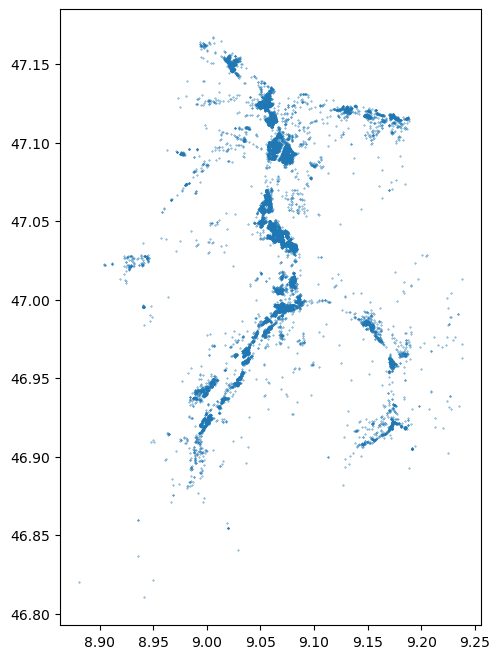

In [246]:
Wohngebaeude_gdf.plot(markersize=.1, figsize=(8, 8))

In [253]:
#Spatial Join der Wohnbevölkerung im Hektarraster (StatpopRaster) und der Wohngebäude aus dem GWR (Wohngebaeude_gdf)
dfsjoin = gpd.sjoin(StatpopRaster, Wohngebaeude_gdf) 

In [254]:
dfsjoin

,RELI,geometry,E_KOORD,N_KOORD,B21BTOT,index_right,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GBAUJ,GAREA,GEBF,GENH1,Energiequelle
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,23812,1632,Glarus,2711992.680,1209016.015,1080.0,2019.0,6.0,NaN,NaN,Unbestimmt
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,24121,1632,Glarus,2711955.170,1209039.763,1030.0,NaN,128.0,NaN,7540.0,Weitere
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,23182,1632,Glarus,2711941.275,1209041.731,1040.0,1900.0,52.0,NaN,7540.0,Weitere
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,26353,1632,Glarus,2711996.468,1209058.748,1040.0,NaN,313.0,NaN,7560.0,Weitere
1,71292091,"POLYGON ((8.92379 47.02333, 8.92510 47.02331, ...",2712900,1209100,3,26380,1632,Glarus,2712968.562,1209156.897,1020.0,NaN,78.0,NaN,7540.0,Weitere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,10520,1631,Glarus Süd,2733047.184,1203091.381,1020.0,NaN,109.0,NaN,7540.0,Weitere
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,10509,1631,Glarus Süd,2733052.806,1203008.164,1020.0,NaN,88.0,NaN,7540.0,Weitere
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,10510,1631,Glarus Süd,2733091.027,1203046.947,1040.0,NaN,254.0,NaN,7540.0,Weitere
2228,73311977,"POLYGON ((9.18609 46.91707, 9.18740 46.91705, ...",2733100,1197700,3,15899,1631,Glarus Süd,2733123.926,1197750.783,1030.0,NaN,91.0,NaN,7540.0,Weitere


In [255]:
# Pivottabelle erstellen
dfpivot = pd.pivot_table(dfsjoin,index='RELI',columns='Energiequelle',aggfunc={'Energiequelle':len})
dfpivot.columns = dfpivot.columns.droplevel()
dfpivot

Energiequelle,Gas,Heizöl,Keine,Unbestimmt,Weitere
RELI,,,,,
71192090,NaN,NaN,NaN,1.0,3.0
71292091,NaN,NaN,NaN,NaN,2.0
71312093,NaN,NaN,NaN,NaN,1.0
71322088,NaN,NaN,NaN,NaN,4.0
71332089,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...
73292029,NaN,NaN,NaN,1.0,4.0
73301978,NaN,NaN,NaN,NaN,12.0
73302030,NaN,NaN,NaN,NaN,3.0


In [258]:
EnergiequellenRaster = StatpopRaster.merge(dfpivot, how='left', on='RELI')
EnergiequellenRaster

,RELI,geometry,E_KOORD,N_KOORD,B21BTOT,Gas,Heizöl,Keine,Unbestimmt,Weitere
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,NaN,NaN,NaN,1.0,3.0
1,71292091,"POLYGON ((8.92379 47.02333, 8.92510 47.02331, ...",2712900,1209100,3,NaN,NaN,NaN,NaN,2.0
2,71312093,"POLYGON ((8.92647 47.02510, 8.92778 47.02508, ...",2713100,1209300,3,NaN,NaN,NaN,NaN,1.0
3,71322088,"POLYGON ((8.92766 47.02058, 8.92897 47.02057, ...",2713200,1208800,3,NaN,NaN,NaN,NaN,4.0
4,71332089,"POLYGON ((8.92900 47.02147, 8.93031 47.02145, ...",2713300,1208900,3,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...
2225,73292029,"POLYGON ((9.18498 46.96387, 9.18630 46.96385, ...",2732900,1202900,8,NaN,NaN,NaN,1.0,4.0
2226,73301978,"POLYGON ((9.18481 46.91799, 9.18612 46.91797, ...",2733000,1197800,6,NaN,NaN,NaN,NaN,12.0
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,NaN,NaN,NaN,NaN,3.0
2228,73311977,"POLYGON ((9.18609 46.91707, 9.18740 46.91705, ...",2733100,1197700,3,NaN,NaN,NaN,NaN,1.0


In [257]:
dfpolynew.isnull().sum()

RELI             0
geometry         0
E_KOORD          0
N_KOORD          0
B21BTOT          0
Gas           1821
Heizöl         812
Keine         2146
Unbestimmt    1286
Weitere        686
dtype: int64

In [261]:
# Die NULL Werte werden mit 0 ersetzt.
EnergiequellenRaster = EnergiequellenRaster.fillna(0)
EnergiequellenRaster


,RELI,geometry,E_KOORD,N_KOORD,B21BTOT,Gas,Heizöl,Keine,Unbestimmt,Weitere
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,0.0,0.0,0.0,1.0,3.0
1,71292091,"POLYGON ((8.92379 47.02333, 8.92510 47.02331, ...",2712900,1209100,3,0.0,0.0,0.0,0.0,2.0
2,71312093,"POLYGON ((8.92647 47.02510, 8.92778 47.02508, ...",2713100,1209300,3,0.0,0.0,0.0,0.0,1.0
3,71322088,"POLYGON ((8.92766 47.02058, 8.92897 47.02057, ...",2713200,1208800,3,0.0,0.0,0.0,0.0,4.0
4,71332089,"POLYGON ((8.92900 47.02147, 8.93031 47.02145, ...",2713300,1208900,3,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2225,73292029,"POLYGON ((9.18498 46.96387, 9.18630 46.96385, ...",2732900,1202900,8,0.0,0.0,0.0,1.0,4.0
2226,73301978,"POLYGON ((9.18481 46.91799, 9.18612 46.91797, ...",2733000,1197800,6,0.0,0.0,0.0,0.0,12.0
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,0.0,0.0,0.0,0.0,3.0
2228,73311977,"POLYGON ((9.18609 46.91707, 9.18740 46.91705, ...",2733100,1197700,3,0.0,0.0,0.0,0.0,1.0


In [262]:
#Die Anzahl Gebäude pro Hektarraster zählen
EnergiequellenRaster['AnzahlGebaeude'] = EnergiequellenRaster['Gas'] + EnergiequellenRaster['Heizöl'] + EnergiequellenRaster['Keine'] + EnergiequellenRaster['Unbestimmt'] + + EnergiequellenRaster['Weitere']

In [263]:
EnergiequellenRaster

,RELI,geometry,E_KOORD,N_KOORD,B21BTOT,Gas,Heizöl,Keine,Unbestimmt,Weitere,AnzahlGebaeude
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,0.0,0.0,0.0,1.0,3.0,4.0
1,71292091,"POLYGON ((8.92379 47.02333, 8.92510 47.02331, ...",2712900,1209100,3,0.0,0.0,0.0,0.0,2.0,2.0
2,71312093,"POLYGON ((8.92647 47.02510, 8.92778 47.02508, ...",2713100,1209300,3,0.0,0.0,0.0,0.0,1.0,1.0
3,71322088,"POLYGON ((8.92766 47.02058, 8.92897 47.02057, ...",2713200,1208800,3,0.0,0.0,0.0,0.0,4.0,4.0
4,71332089,"POLYGON ((8.92900 47.02147, 8.93031 47.02145, ...",2713300,1208900,3,0.0,0.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2225,73292029,"POLYGON ((9.18498 46.96387, 9.18630 46.96385, ...",2732900,1202900,8,0.0,0.0,0.0,1.0,4.0,5.0
2226,73301978,"POLYGON ((9.18481 46.91799, 9.18612 46.91797, ...",2733000,1197800,6,0.0,0.0,0.0,0.0,12.0,12.0
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,0.0,0.0,0.0,0.0,3.0,3.0
2228,73311977,"POLYGON ((9.18609 46.91707, 9.18740 46.91705, ...",2733100,1197700,3,0.0,0.0,0.0,0.0,1.0,1.0


In [268]:
# Die Anzahl Einwohner aus der STATPOP werden nun proportional auf die Gebäude verteilt innerhalb einer Hektarrasterzelle
EnergiequellenRaster['PaxGas'] = EnergiequellenRaster['B21BTOT']/EnergiequellenRaster['AnzahlGebaeude']*EnergiequellenRaster['Gas']
EnergiequellenRaster['PaxÖl'] = EnergiequellenRaster['B21BTOT']/EnergiequellenRaster['AnzahlGebaeude']*EnergiequellenRaster['Heizöl']
EnergiequellenRaster['PaxKeine'] = EnergiequellenRaster['B21BTOT']/EnergiequellenRaster['AnzahlGebaeude']*EnergiequellenRaster['Keine']
EnergiequellenRaster['PaxUnbestimmt'] = EnergiequellenRaster['B21BTOT']/EnergiequellenRaster['AnzahlGebaeude']*EnergiequellenRaster['Unbestimmt']
EnergiequellenRaster['PaxWeitere'] = EnergiequellenRaster['B21BTOT']/EnergiequellenRaster['AnzahlGebaeude']*EnergiequellenRaster['Weitere']


In [295]:
# Die NULL Werte werden mit 0 ersetzt. Muss noch einmal gemacht werden weil bei einigen wenigen Rasterzellen die AnzahlGebaeude = 0 ist was in einer Dividierung durch 0 entspricht
EnergiequellenRaster = EnergiequellenRaster.fillna(0)
EnergiequellenRaster

,RELI,geometry,E_KOORD,N_KOORD,B21BTOT,Gas,Heizöl,Keine,Unbestimmt,Weitere,AnzahlGebaeude,PaxGas,PaxÖl,PaxKeine,PaxUnbestimmt,PaxWeitere
0,71192090,"POLYGON ((8.91061 47.02260, 8.91193 47.02259, ...",2711900,1209000,3,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0,0.75,2.25
1,71292091,"POLYGON ((8.92379 47.02333, 8.92510 47.02331, ...",2712900,1209100,3,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.00,3.00
2,71312093,"POLYGON ((8.92647 47.02510, 8.92778 47.02508, ...",2713100,1209300,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,3.00
3,71322088,"POLYGON ((8.92766 47.02058, 8.92897 47.02057, ...",2713200,1208800,3,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.00,3.00
4,71332089,"POLYGON ((8.92900 47.02147, 8.93031 47.02145, ...",2713300,1208900,3,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,73292029,"POLYGON ((9.18498 46.96387, 9.18630 46.96385, ...",2732900,1202900,8,0.0,0.0,0.0,1.0,4.0,5.0,0.0,0.0,0.0,1.60,6.40
2226,73301978,"POLYGON ((9.18481 46.91799, 9.18612 46.91797, ...",2733000,1197800,6,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.00,6.00
2227,73302030,"POLYGON ((9.18633 46.96475, 9.18764 46.96473, ...",2733000,1203000,3,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.00,3.00
2228,73311977,"POLYGON ((9.18609 46.91707, 9.18740 46.91705, ...",2733100,1197700,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,3.00


In [298]:
# Dataframe entschlacken d.h. Die nicht verwendeten Attribute löschen
PaxPerEnergieRaster = EnergiequellenRaster.drop(['E_KOORD','N_KOORD','B21BTOT','Gas','Heizöl','Keine','Weitere','AnzahlGebaeude','RELI','Unbestimmt'], axis=1)

# 3. Hektarraster einer Gemeinde zuweisen

In [299]:
PaxPerEnergieRaster['geometry'] = PaxPerEnergieRaster.centroid

C:\Users\AninaNico\AppData\Local\Temp\ipykernel_6816\3516154566.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  PaxPerEnergieRaster['geometry'] = PaxPerEnergieRaster.centroid


In [300]:
PaxPerEnergieRaster

,geometry,PaxGas,PaxÖl,PaxKeine,PaxUnbestimmt,PaxWeitere
0,POINT (8.91128 47.02304),0.0,0.0,0.0,0.75,2.25
1,POINT (8.92446 47.02377),0.0,0.0,0.0,0.00,3.00
2,POINT (8.92714 47.02554),0.0,0.0,0.0,0.00,3.00
3,POINT (8.92833 47.02102),0.0,0.0,0.0,0.00,3.00
4,POINT (8.92967 47.02191),0.0,0.0,0.0,0.00,3.00
...,...,...,...,...,...,...
2225,POINT (9.18565 46.96431),0.0,0.0,0.0,1.60,6.40
2226,POINT (9.18548 46.91842),0.0,0.0,0.0,0.00,6.00
2227,POINT (9.18700 46.96519),0.0,0.0,0.0,0.00,3.00
2228,POINT (9.18676 46.91751),0.0,0.0,0.0,0.00,3.00


In [301]:
PaxPerEnergieRaster.isnull().sum()

geometry         0
PaxGas           0
PaxÖl            0
PaxKeine         0
PaxUnbestimmt    0
PaxWeitere       0
dtype: int64

In [307]:
#Gemeindegrenzen reinladen
switzerland_gemeinde = gpd.read_file(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\Swissboundaries/swissBOUNDARIES3D_1_3_LV95_LN02.gdb', layer=3).to_crs(epsg='4326')
switzerland_gemeinde

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,GEM_TEIL,GEM_FLAECHE,SEE_FLAECHE,ICC,SHN,REVISION_QUALITAET,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry
0,{D5A9677C-FE38-44F6-B0E8-3177F6252C81},2020-11-03 09:12:28+00:00,2008-11-24 00:00:00+00:00,2000,1,2022,5,400,500,2020,...,0,43861.0,NaN,CH,CH18433762,2021_Aufbau,4624.0,112473.317556,4.386061e+08,MULTIPOLYGON Z (((10.23251 46.87160 2980.12200...
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2021-10-26 13:07:34+00:00,2008-11-24 00:00:00+00:00,2006,1,2022,5,400,500,2021,...,0,43003.0,NaN,CH,CH08001631,2021_Aufbau,9480.0,116787.901278,4.300324e+08,"MULTIPOLYGON Z (((8.95776 46.80444 3402.83600,..."
2,{AB2BA4A5-EB8C-40C7-A259-271DAC93C767},2021-10-26 13:07:12+00:00,2008-11-24 00:00:00+00:00,2000,1,2022,5,400,500,2021,...,0,34404.0,NaN,CH,CH18433746,2021_Aufbau,1506.0,102012.979193,3.440368e+08,MULTIPOLYGON Z (((10.10516 46.84090 3111.08100...
3,{550D0610-1EE3-4748-8F29-88072753FFDC},2021-10-26 13:07:19+00:00,2008-11-24 00:00:00+00:00,2000,1,2022,5,400,500,2021,...,0,32377.0,NaN,CH,CH18413543,2021_Aufbau,2377.0,93629.567857,3.237737e+08,"MULTIPOLYGON Z (((9.49892 46.62472 2730.10000,..."
4,{5B0C1705-1D2B-4E53-9970-6BC3DE33A0F7},2021-10-26 13:07:08+00:00,2008-11-24 00:00:00+00:00,1997,1,2022,5,400,500,2021,...,0,30191.0,NaN,CH,CH23036037,2021_Aufbau,10329.0,106069.364264,3.019118e+08,"MULTIPOLYGON Z (((7.29444 45.92182 3576.25800,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,{7FAC8A17-64F7-4920-B7EC-29A4B4F3630E},2015-12-08 15:34:34+00:00,2008-11-24 00:00:00+00:00,1997,1,2022,5,400,500,2015,...,3,NaN,NaN,CH,CH19094257,2021_Aufbau,NaN,392.427744,6.167572e+03,"MULTIPOLYGON Z (((7.79979 47.49804 482.51200, ..."
2282,{454AF364-1D3A-4EC8-9033-B5FF8320DBB0},2015-12-10 09:35:38+00:00,2008-11-24 00:00:00+00:00,2002,1,2022,5,400,500,2015,...,2,NaN,NaN,CH,CH16003104,2021_Aufbau,NaN,303.496096,5.820701e+03,"MULTIPOLYGON Z (((9.36218 47.38678 783.96600, ..."
2283,{CF0F9771-1C72-4F3D-9476-8D928A01C031},2015-12-10 09:35:33+00:00,2008-11-24 00:00:00+00:00,2002,1,2022,5,400,500,2015,...,3,NaN,NaN,CH,CH16003111,2021_Aufbau,NaN,246.833477,2.789099e+03,"MULTIPOLYGON Z (((9.61262 47.44358 643.66300, ..."
2284,{B9D2A8BB-2A0B-4F54-9200-F9947892E6F1},2021-10-26 13:07:30+00:00,2008-11-24 00:00:00+00:00,2000,1,2022,5,400,500,2021,...,0,1830.0,237.0,CH,CH25006621,2021_Aufbau,203856.0,22802.041363,1.829613e+07,"MULTIPOLYGON Z (((6.12765 46.18777 379.24200, ..."


In [309]:
switzerland_gemeinde['NAME']

0                Scuol
1           Glarus Süd
2               Zernez
3               Surses
4        Val de Bagnes
             ...      
2281           Olsberg
2282    Schlatt-Haslen
2283           Oberegg
2284            Genève
2285      Carouge (GE)
Name: NAME, Length: 2286, dtype: object

<AxesSubplot:>

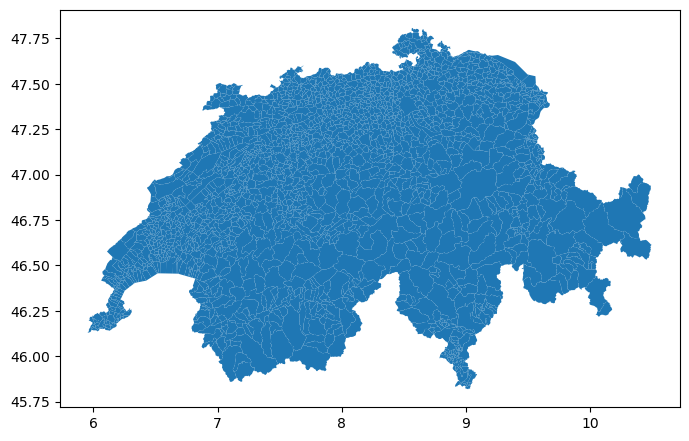

In [285]:
switzerland_gemeinde.plot(markersize=.1, figsize=(8, 8))


In [303]:
#Spatial Join der Wohnbevölkerung im Hektarraster (StatpopRaster) und der Wohngebäude aus dem GWR (Wohngebaeude_gdf)
gemeindejoin = gpd.sjoin(switzerland_gemeinde, PaxPerEnergieRaster)
gemeindejoin

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry,index_right,PaxGas,PaxÖl,PaxKeine,PaxUnbestimmt,PaxWeitere
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2021-10-26 13:07:34+00:00,2008-11-24 00:00:00+00:00,2006,1,2022,5,400,500,2021,...,9480.0,116787.901278,4.300324e+08,"MULTIPOLYGON Z (((8.95776 46.80444 3402.83600,...",2131,0.0,0.000000,0.0,0.0,3.000000
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2021-10-26 13:07:34+00:00,2008-11-24 00:00:00+00:00,2006,1,2022,5,400,500,2021,...,9480.0,116787.901278,4.300324e+08,"MULTIPOLYGON Z (((8.95776 46.80444 3402.83600,...",2228,0.0,0.000000,0.0,0.0,3.000000
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2021-10-26 13:07:34+00:00,2008-11-24 00:00:00+00:00,2006,1,2022,5,400,500,2021,...,9480.0,116787.901278,4.300324e+08,"MULTIPOLYGON Z (((8.95776 46.80444 3402.83600,...",2171,0.0,0.000000,0.0,0.0,3.000000
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2021-10-26 13:07:34+00:00,2008-11-24 00:00:00+00:00,2006,1,2022,5,400,500,2021,...,9480.0,116787.901278,4.300324e+08,"MULTIPOLYGON Z (((8.95776 46.80444 3402.83600,...",2149,0.0,1.500000,0.0,0.0,7.500000
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2021-10-26 13:07:34+00:00,2008-11-24 00:00:00+00:00,2006,1,2022,5,400,500,2021,...,9480.0,116787.901278,4.300324e+08,"MULTIPOLYGON Z (((8.95776 46.80444 3402.83600,...",2132,0.0,4.285714,0.0,0.0,5.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,{696D9696-8D4A-4707-81FE-E8149EE7A761},2021-10-26 13:07:28+00:00,2008-11-24 00:00:00+00:00,2003,1,2022,5,400,500,2021,...,3923.0,33670.577298,3.990460e+07,"MULTIPOLYGON Z (((9.12283 47.18578 1951.10500,...",860,0.0,0.000000,0.0,0.0,0.000000
228,{696D9696-8D4A-4707-81FE-E8149EE7A761},2021-10-26 13:07:28+00:00,2008-11-24 00:00:00+00:00,2003,1,2022,5,400,500,2021,...,3923.0,33670.577298,3.990460e+07,"MULTIPOLYGON Z (((9.12283 47.18578 1951.10500,...",577,0.0,0.000000,0.0,0.0,0.000000
1474,{59B81729-4C37-4EF2-AAA6-7A6AA2AD51B8},2021-10-26 13:07:28+00:00,2008-11-24 00:00:00+00:00,2003,1,2022,5,400,500,2021,...,1753.0,14155.023968,5.748661e+06,"MULTIPOLYGON Z (((9.07172 47.13000 418.81000, ...",1742,0.0,11.000000,0.0,0.0,0.000000
1474,{59B81729-4C37-4EF2-AAA6-7A6AA2AD51B8},2021-10-26 13:07:28+00:00,2008-11-24 00:00:00+00:00,2003,1,2022,5,400,500,2021,...,1753.0,14155.023968,5.748661e+06,"MULTIPOLYGON Z (((9.07172 47.13000 418.81000, ...",1797,0.0,0.000000,0.0,0.0,0.000000


In [316]:
# Zählt alle Gebäude pro Gemeinde, Bauperiode und Energiequelle
Gemeindeliste = gemeindejoin[['PaxGas','PaxÖl','PaxKeine','PaxUnbestimmt','PaxWeitere']].sum().reset_index()
Gemeindeliste

,index,0
0,PaxGas,4569.310575
1,PaxÖl,19358.856298
2,PaxKeine,392.144896
3,PaxUnbestimmt,6507.002394
4,PaxWeitere,11012.685836


In [319]:
gemeindejoin.groupby(['NAME'])['PaxGas','PaxÖl','PaxKeine','PaxUnbestimmt','PaxWeitere'].agg('sum')

C:\Users\AninaNico\AppData\Local\Temp\ipykernel_6816\368973841.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gemeindejoin.groupby(['NAME'])['PaxGas','PaxÖl','PaxKeine','PaxUnbestimmt','PaxWeitere'].agg('sum')


,PaxGas,PaxÖl,PaxKeine,PaxUnbestimmt,PaxWeitere
NAME,,,,,
Glarus,2274.943626,6440.602479,125.049332,1365.879431,2357.525133
Glarus Nord,2238.170714,9559.258481,171.714977,3699.079801,3759.776027
Glarus Süd,56.196235,3342.995339,95.380588,1442.043162,4895.384676
Schänis,0.000000,5.000000,0.000000,0.000000,0.000000
Weesen,0.000000,11.000000,0.000000,0.000000,0.000000


In [14]:
# GWR-Daten Gebäude einlesen und erste Zeilen anschauen

Gebaeude = pd.read_csv(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\GWR/gebaeude_batiment_edificio.csv',
                sep='\t',
                usecols = ['GGDENR','GGDENAME','GKODE','GKODN','GKAT','GENH1','GEBF','GAREA','GVOL','GVOLNORM'])
Gebaeude.head()

,GGDENR,GGDENAME,GKODE,GKODN,GKAT,GAREA,GVOL,GVOLNORM,GEBF,GENH1
0,1630,Glarus Nord,2728994.079,1220577.999,1020.0,130.0,NaN,NaN,NaN,7598.0
1,1630,Glarus Nord,2729002.560,1220562.723,1020.0,152.0,NaN,NaN,NaN,7598.0
2,1630,Glarus Nord,2728624.604,1220458.168,1020.0,173.0,NaN,NaN,NaN,7530.0
3,1630,Glarus Nord,2728375.697,1220483.098,1020.0,102.0,NaN,NaN,NaN,7598.0
4,1630,Glarus Nord,2724463.782,1216958.423,1020.0,157.0,NaN,NaN,NaN,7598.0


In [17]:
len(Gebaeude)

28086

In [15]:
# Nullwerte anschauen
buildings_null = Gebaeude.isnull().sum()
buildings_null

GGDENR          0
GGDENAME        0
GKODE           4
GKODN           4
GKAT            1
GAREA        5628
GVOL        28086
GVOLNORM    28086
GEBF        27739
GENH1       10839
dtype: int64

In [3]:
# Alle Attribute und Datentypen der importierten Daten anschauen.
df.dtypes

EGID            int64
GDEKT          object
GGDENR          int64
GGDENAME       object
EGRID          object
LGBKR         float64
LPARZ          object
LPARZSX       float64
LTYP          float64
GEBNR          object
GBEZ           object
GKODE         float64
GKODN         float64
GKSCE         float64
GSTAT           int64
GKAT          float64
GKLAS         float64
GBAUJ         float64
GBAUM         float64
GBAUP         float64
GABBJ         float64
GAREA         float64
GVOL          float64
GVOLNORM      float64
GVOLSCE       float64
GASTW         float64
GANZWHG       float64
GAZZI         float64
GSCHUTZR      float64
GEBF          float64
GWAERZH1      float64
GENH1         float64
GWAERSCEH1    float64
GWAERDATH1     object
GWAERZH2      float64
GENH2         float64
GWAERSCEH2    float64
GWAERDATH2     object
GWAERZW1      float64
GENW1         float64
GWAERSCEW1    float64
GWAERDATW1     object
GWAERZW2      float64
GENW2         float64
GWAERSCEW2    float64
GWAERDATW2

In [12]:
# GWR-Daten Wohnungen einlesen und erste Zeilen anschauen

wohnung = pd.read_csv(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\GWR/wohnung_logement_abitazione.csv',
                sep='\t',
                usecols = ['EWID', 'WAREA','WAZIM'])
wohnung.head()

,EWID,WAREA,WAZIM
0,1,216.0,4.0
1,1,180.0,6.0
2,1,120.0,4.0
3,1,400.0,6.0
4,1,154.0,6.0


In [2]:
# STATPOP einlesen und erste Zeilen anschauen

statpop = pd.read_csv(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\Statpop/Statpop_Glarus2.csv',
                sep=';',
                usecols = ['RELI', 'E_KOORD','N_KOORD','B21BTOT'])
statpop.head()

,RELI,E_KOORD,N_KOORD,B21BTOT
0,71192090,2711900,1209000,3
1,71292091,2712900,1209100,3
2,71312093,2713100,1209300,3
3,71322088,2713200,1208800,3
4,71332089,2713300,1208900,3


In [3]:
statpop.dtypes

RELI       int64
E_KOORD    int64
N_KOORD    int64
B21BTOT    int64
dtype: object

In [32]:
statpop

,RELI,E_KOORD,N_KOORD,B21BTOT,geometry
0,71192090,2712900,1210000,3,POINT (2712100.000 1209200.000)
1,71292091,2713900,1210100,3,POINT (2713100.000 1209300.000)
2,71312093,2714100,1210300,3,POINT (2713300.000 1209500.000)
3,71322088,2714200,1209800,3,POINT (2713400.000 1209000.000)
4,71332089,2714300,1209900,3,POINT (2713500.000 1209100.000)
...,...,...,...,...,...
2225,73292029,2733900,1203900,8,POINT (2733100.000 1203100.000)
2226,73301978,2734000,1198800,6,POINT (2733200.000 1198000.000)
2227,73302030,2734000,1204000,3,POINT (2733200.000 1203200.000)
2228,73311977,2734100,1198700,3,POINT (2733300.000 1197900.000)


In [33]:
statpop2 = statpop
statpop2['E_KOORD'] = statpop2['E_KOORD']+100
statpop2['N_KOORD'] = statpop2['N_KOORD']+100

statpop3 = statpop
statpop3['E_KOORD'] = statpop3['E_KOORD']+100
statpop3

statpop4 = statpop
statpop4['N_KOORD'] = statpop4['N_KOORD']+100
statpop2

,RELI,E_KOORD,N_KOORD,B21BTOT,geometry
0,71192090,2713100,1210200,3,POINT (2712100.000 1209200.000)
1,71292091,2714100,1210300,3,POINT (2713100.000 1209300.000)
2,71312093,2714300,1210500,3,POINT (2713300.000 1209500.000)
3,71322088,2714400,1210000,3,POINT (2713400.000 1209000.000)
4,71332089,2714500,1210100,3,POINT (2713500.000 1209100.000)
...,...,...,...,...,...
2225,73292029,2734100,1204100,8,POINT (2733100.000 1203100.000)
2226,73301978,2734200,1199000,6,POINT (2733200.000 1198000.000)
2227,73302030,2734200,1204200,3,POINT (2733200.000 1203200.000)
2228,73311977,2734300,1198900,3,POINT (2733300.000 1197900.000)


In [6]:
statpoptot = pd.concat([statpop, statpop2, statpop3, statpop4])
statpoptot

,RELI,E_KOORD,N_KOORD,B21BTOT
0,71192090,2712100,1209200,3
1,71292091,2713100,1209300,3
2,71312093,2713300,1209500,3
3,71322088,2713400,1209000,3
4,71332089,2713500,1209100,3
...,...,...,...,...
2225,73292029,2733100,1203100,8
2226,73301978,2733200,1198000,6
2227,73302030,2733200,1203200,3
2228,73311977,2733300,1197900,3


In [8]:
gdf = gpd.GeoDataFrame(
    statpop, geometry=gpd.points_from_xy(statpop.E_KOORD, statpop.N_KOORD,crs="EPSG:2056"))

gdf

,RELI,E_KOORD,N_KOORD,B21BTOT,geometry
0,71192090,2712100,1209200,3,POINT (2712100.000 1209200.000)
1,71292091,2713100,1209300,3,POINT (2713100.000 1209300.000)
2,71312093,2713300,1209500,3,POINT (2713300.000 1209500.000)
3,71322088,2713400,1209000,3,POINT (2713400.000 1209000.000)
4,71332089,2713500,1209100,3,POINT (2713500.000 1209100.000)
...,...,...,...,...,...
2225,73292029,2733100,1203100,8,POINT (2733100.000 1203100.000)
2226,73301978,2733200,1198000,6,POINT (2733200.000 1198000.000)
2227,73302030,2733200,1203200,3,POINT (2733200.000 1203200.000)
2228,73311977,2733300,1197900,3,POINT (2733300.000 1197900.000)


In [24]:
gdf= gpd.GeoDataFrame(
    statpoptot.groupby("RELI").apply(
        lambda d: pd.Series(
            {
                #"Einwohner": "|".join(d["B21BTOT"].tolist()),
                "geometry": shapely.geometry.Polygon(
                    d.loc[:, ["E_KOORD", "N_KOORD"]].values
                ),
            }
        )
    )
,crs="EPSG:2056")

In [27]:
gdf = gdf.to_crs(epsg='4326')
gdf

,geometry
RELI,
71192090,"POLYGON ((8.91329 47.02437, 8.91329 47.02437, ..."
71292091,"POLYGON ((8.92647 47.02510, 8.92647 47.02510, ..."
71312093,"POLYGON ((8.92915 47.02686, 8.92915 47.02686, ..."
71322088,"POLYGON ((8.93034 47.02235, 8.93034 47.02235, ..."
71332089,"POLYGON ((8.93168 47.02323, 8.93168 47.02323, ..."
...,...
73292029,"POLYGON ((9.18767 46.96563, 9.18767 46.96563, ..."
73301978,"POLYGON ((9.18749 46.91974, 9.18749 46.91974, ..."
73302030,"POLYGON ((9.18901 46.96651, 9.18901 46.96651, ..."


In [4]:
#Gemeindegrenzen reinladen
switzerland_gemeinde = gpd.read_file(r'C:\Users\AninaNico\Documents\CAS_SpatialDataAnalytics\Zertifikatsarbeit\Uebung\Daten\Swissboundaries/swissBOUNDARIES3D_1_3_LV95_LN02.gdb', layer=4).to_crs(epsg='4326')
switzerland_gemeinde

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,REVISION_QUALITAET,BEZIRKSFLAECHE,BEZIRK_TEIL,NAME,KANTONSNUMMER,ICC,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry
0,{9D91928E-115F-43DA-AF90-10625E58B7F9},2020-11-19 10:42:55+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2020,...,2021_Aufbau,137355.0,0,Surselva,18,CH,21318.0,219016.238125,1.373557e+09,"MULTIPOLYGON Z (((8.75075 46.57622 3015.71100,..."
1,{18B8E2A0-F043-4198-87FC-119BA9F5E762},2017-12-05 08:16:27+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,100,2018,...,2021_Aufbau,122931.0,0,Interlaken-Oberhasli,2,CH,47645.0,253047.797904,1.229310e+09,"MULTIPOLYGON Z (((7.82750 46.66491 557.68100, ..."
2,{1C504398-486E-49F8-A024-B59233F9DE89},2018-11-22 13:41:29+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2019,...,2021_Aufbau,119653.0,0,Engiadina Bassa/Val Müstair,18,CH,9163.0,213412.789519,1.196526e+09,MULTIPOLYGON Z (((10.10516 46.84090 3111.08100...
3,{FDA49AE0-D4C8-43EF-9275-0624413C5949},2020-11-19 10:42:55+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2020,...,2021_Aufbau,97358.0,0,Maloja,18,CH,18294.0,209907.879572,9.735755e+08,MULTIPOLYGON Z (((10.04479 46.47676 3103.60600...
4,{25673BF2-FF32-48E3-AA80-880EA3D4B856},2021-11-02 08:51:11+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2021,...,2021_Aufbau,94246.0,1,Bern-Mittelland,2,CH,418140.0,251379.775645,9.399759e+08,"MULTIPOLYGON Z (((7.49990 46.80292 781.88100, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,{C99AE0E1-573A-4440-9ADA-06782982AAB2},2015-12-08 15:32:09+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2015,...,2021_Aufbau,NaN,2,Wil,17,CH,NaN,4000.033119,5.115743e+05,"MULTIPOLYGON Z (((9.19865 47.34778 1031.51400,..."
154,{7692790C-4B91-47D9-BA09-43CC6E452BAE},2015-12-08 15:32:09+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2015,...,2021_Aufbau,NaN,2,St. Gallen,17,CH,NaN,1481.818896,1.054074e+05,"MULTIPOLYGON Z (((9.35386 47.51181 462.33000, ..."
155,{9A0560DD-7D2C-42B5-AE1E-1F420E3639EC},2015-12-08 15:32:09+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2015,...,2021_Aufbau,NaN,2,Baden,19,CH,NaN,537.990138,1.486562e+04,"MULTIPOLYGON Z (((8.43823 47.40756 388.82200, ..."
156,{6F4B4B09-2C8F-47E2-B457-5465910DC3B0},2015-12-08 15:32:09+00:00,2012-10-26 12:21:34+00:00,2012,10,2022,5,400,500,2015,...,2021_Aufbau,NaN,2,Frauenfeld,20,CH,NaN,477.453393,1.370887e+04,"MULTIPOLYGON Z (((8.86717 47.65488 397.78900, ..."


In [11]:
#Die Hektarrasterzelle aufziehen durch addieren von 100 pro Koordinate
statpop['E_KOORD2'] = statpop.E_KOORD + 100
statpop['N_KOORD2'] = statpop.N_KOORD + 100
statpop


,RELI,E_KOORD,N_KOORD,B21BTOT,E_KOORD2,N_KOORD2,geometry
0,71192090,2711900,1209000,3,2712000,1209100,POINT (2711900.000 1209000.000)
1,71292091,2712900,1209100,3,2713000,1209200,POINT (2712900.000 1209100.000)
2,71312093,2713100,1209300,3,2713200,1209400,POINT (2713100.000 1209300.000)
3,71322088,2713200,1208800,3,2713300,1208900,POINT (2713200.000 1208800.000)
4,71332089,2713300,1208900,3,2713400,1209000,POINT (2713300.000 1208900.000)
...,...,...,...,...,...,...,...
2225,73292029,2732900,1202900,8,2733000,1203000,POINT (2732900.000 1202900.000)
2226,73301978,2733000,1197800,6,2733100,1197900,POINT (2733000.000 1197800.000)
2227,73302030,2733000,1203000,3,2733100,1203100,POINT (2733000.000 1203000.000)
2228,73311977,2733100,1197700,3,2733200,1197800,POINT (2733100.000 1197700.000)


In [17]:
# Create second column of Point
gdf['geom2'] = [Point(x, y) for x, y in zip(statpop.E_KOORD, statpop.N_KOORD)]

C:\Users\AninaNico\Anaconda3\envs\spatial_analytics\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [88]:
statpop['Geometrie'] = 'POLYGON (' + str(statpop['E_KOORD']) + str(statpop['N_KOORD']) +')'
statpop['Geometrie']

0       POLYGON (0       2711900\n1       2712900\n2  ...
1       POLYGON (0       2711900\n1       2712900\n2  ...
2       POLYGON (0       2711900\n1       2712900\n2  ...
3       POLYGON (0       2711900\n1       2712900\n2  ...
4       POLYGON (0       2711900\n1       2712900\n2  ...
                              ...                        
2225    POLYGON (0       2711900\n1       2712900\n2  ...
2226    POLYGON (0       2711900\n1       2712900\n2  ...
2227    POLYGON (0       2711900\n1       2712900\n2  ...
2228    POLYGON (0       2711900\n1       2712900\n2  ...
2229    POLYGON (0       2711900\n1       2712900\n2  ...
Name: Geometrie, Length: 2230, dtype: object

In [81]:
statpop['Geometrie'] = 'POLYGON ('statpop['E_KOORD'] statpop['N_KOORD']','statpop['E_KOORD'] statpop['N_KOORD2']','statpop['E_KOORD2'] statpop['N_KOORD2']','statpop['E_KOORD'] statpop['N_KOORD2']','statpop['E_KOORD'] statpop['N_KOORD']')'

statpop

SyntaxError: invalid syntax (3580213438.py, line 1)

In [14]:
gdf = gpd.GeoDataFrame(
    statpop, geometry=gpd.points_from_xy(statpop.E_KOORD, statpop.N_KOORD,crs="EPSG:2056"))

gdf

,RELI,E_KOORD,N_KOORD,B21BTOT,E_KOORD2,N_KOORD2,geometry
0,71192090,2711900,1209000,3,2712000,1209100,POINT (2711900.000 1209000.000)
1,71292091,2712900,1209100,3,2713000,1209200,POINT (2712900.000 1209100.000)
2,71312093,2713100,1209300,3,2713200,1209400,POINT (2713100.000 1209300.000)
3,71322088,2713200,1208800,3,2713300,1208900,POINT (2713200.000 1208800.000)
4,71332089,2713300,1208900,3,2713400,1209000,POINT (2713300.000 1208900.000)
...,...,...,...,...,...,...,...
2225,73292029,2732900,1202900,8,2733000,1203000,POINT (2732900.000 1202900.000)
2226,73301978,2733000,1197800,6,2733100,1197900,POINT (2733000.000 1197800.000)
2227,73302030,2733000,1203000,3,2733100,1203100,POINT (2733000.000 1203000.000)
2228,73311977,2733100,1197700,3,2733200,1197800,POINT (2733100.000 1197700.000)


In [18]:
gdf = gdf.to_crs(epsg='4326')

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [26]:
import folium
m = folium.Map([47.07507, 9.06587], zoom_start=10, tiles='cartodbpositron')
folium.GeoJson(gdf).add_to(m)
folium.LatLngPopup().add_to(m)
m

<AxesSubplot:>

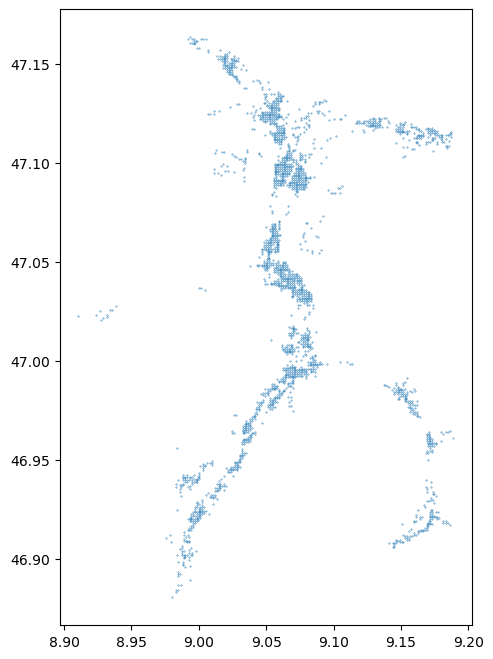

In [89]:
gdf.plot(markersize=.1, figsize=(8, 8))

C:\Users\AninaNico\Anaconda3\envs\spatial_analytics\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

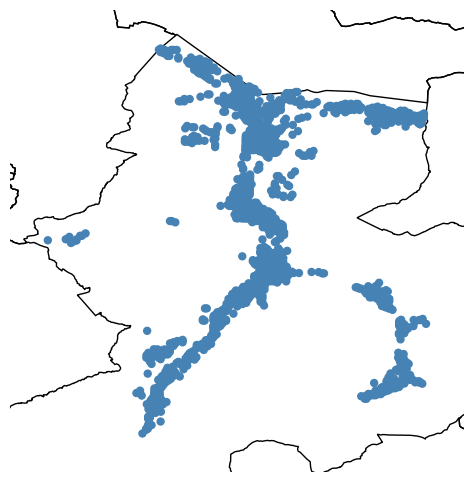

In [73]:
ax = gplt.polyplot(switzerland_gemeinde)
gplt.pointplot(gdf,ax=ax)

In [29]:
#Die Hektarrasterzelle aufziehen durch addieren von 100 pro Koordinate
statpop['E_KOORD2'] = statpop.E_KOORD + 100
statpop['N_KOORD2'] = statpop.N_KOORD + 100
statpop


,RELI,E_KOORD,N_KOORD,B21BTOT,E_KOORD2,N_KOORD2
0,71192090,2711900,1209000,3,2712000,1209100
1,71292091,2712900,1209100,3,2713000,1209200
2,71312093,2713100,1209300,3,2713200,1209400
3,71322088,2713200,1208800,3,2713300,1208900
4,71332089,2713300,1208900,3,2713400,1209000
...,...,...,...,...,...,...
2225,73292029,2732900,1202900,8,2733000,1203000
2226,73301978,2733000,1197800,6,2733100,1197900
2227,73302030,2733000,1203000,3,2733100,1203100
2228,73311977,2733100,1197700,3,2733200,1197800


In [23]:
# gemäss offiziellen Zahlen war die Bevölkerung in Glarus im 2021 41190
# Aufgrund von Datenschutzgründenw werden in der Statisik Werte unter 4 generell als 3 dargestellt. Darum wird die Bevölkerung überschätzt.


statpop.sum()

RELI       161464948356
E_KOORD      6074602400
N_KOORD      2700835600
B21BTOT           41889
dtype: int64